In [1]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.shape
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

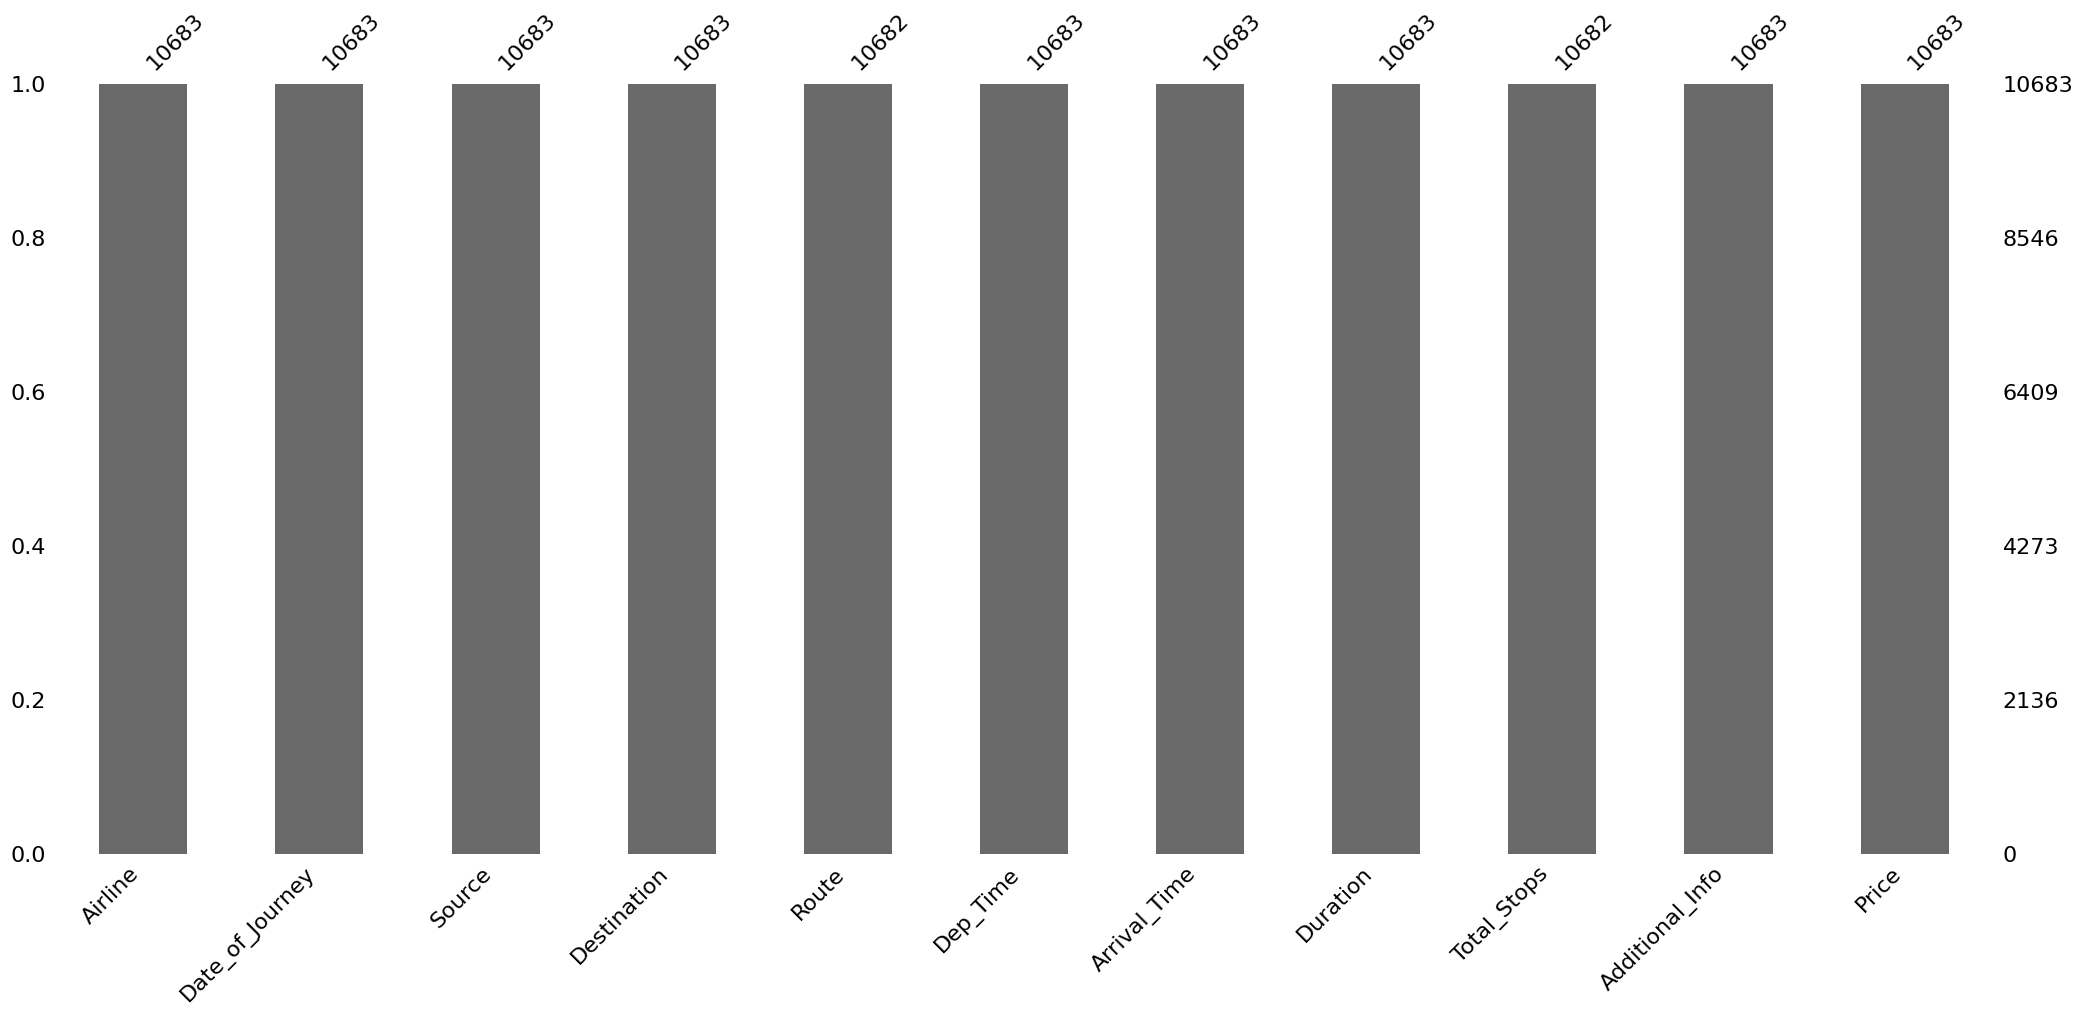

In [6]:
import missingno as msno
msno.bar(df)
plt.show

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [13]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [15]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-13 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-13 05:50:00,2023-04-13 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-13 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-04-13 18:05:00,2023-04-13 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-04-13 16:50:00,2023-04-13 21:35:00,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2023-04-13 09:00:00,2023-04-13 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 18:55:00,2023-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 08:00:00,2023-03-02 05:05:00,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 08:55:00,2023-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2023-04-13 11:25:00,2023-04-13 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [16]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [18]:
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [19]:
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [20]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-04-13 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-13 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-13 09:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-04-13 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-04-13 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2023-04-13 09:00:00,2h 25m,non-stop,No info,3873,24,6,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 18:55:00,15h 30m,1 stop,In-flight meal not included,11087,12,3,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 08:00:00,21h 5m,1 stop,No info,22270,1,3,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 08:55:00,25h 30m,1 stop,In-flight meal not included,11087,12,3,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2023-04-13 11:25:00,7h 50m,1 stop,No info,8625,27,5,19,15


In [21]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [22]:
df['Duration']=duration

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-04-13 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-13 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-13 09:25:00,19h 0m,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-04-13 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-04-13 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [24]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [25]:
df['dur_hour']=df['Duration'].apply(hour)

In [26]:
df['dur_min']=df['Duration'].apply(minutes)

In [27]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-04-13 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-13 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-13 09:25:00,19h 0m,2 stops,No info,13882,9,6,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-04-13 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-04-13 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2023-04-13 09:00:00,2h 25m,non-stop,No info,3873,24,6,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 18:55:00,15h 30m,1 stop,In-flight meal not included,11087,12,3,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 08:00:00,21h 5m,1 stop,No info,22270,1,3,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-04-13 08:55:00,25h 30m,1 stop,In-flight meal not included,11087,12,3,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2023-04-13 11:25:00,7h 50m,1 stop,No info,8625,27,5,19,15,7,50


In [28]:
drop_col(df,'Duration')

In [29]:
df.dtypes

Airline                      object
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Total_Stops                  object
Additional_Info              object
Price                         int64
journey_day                   int32
journey_month                 int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
dur_hour                     object
dur_min                      object
dtype: object

In [30]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [31]:
df.dtypes

Airline                      object
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Total_Stops                  object
Additional_Info              object
Price                         int64
journey_day                   int32
journey_month                 int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
dur_hour                      int32
dur_min                       int32
dtype: object

In [32]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [33]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Dep_Time',
 'Price',
 'journey_day',
 'journey_month',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [34]:
categorical = df[column]

In [35]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [36]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

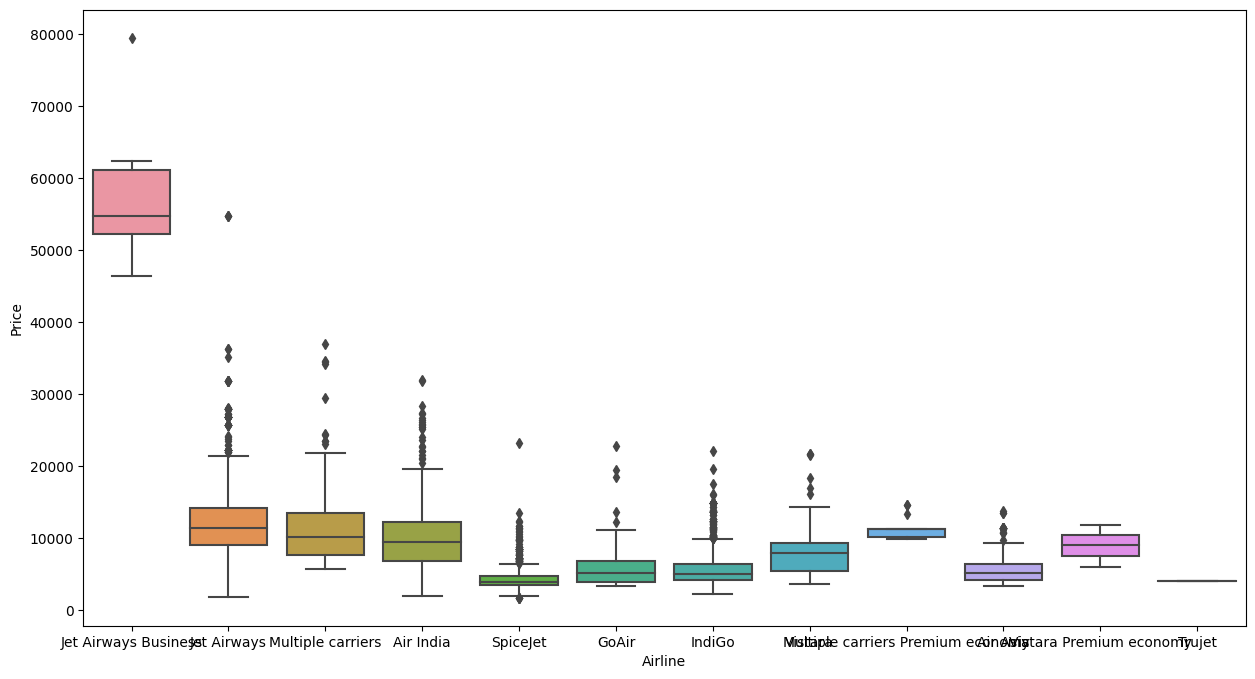

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

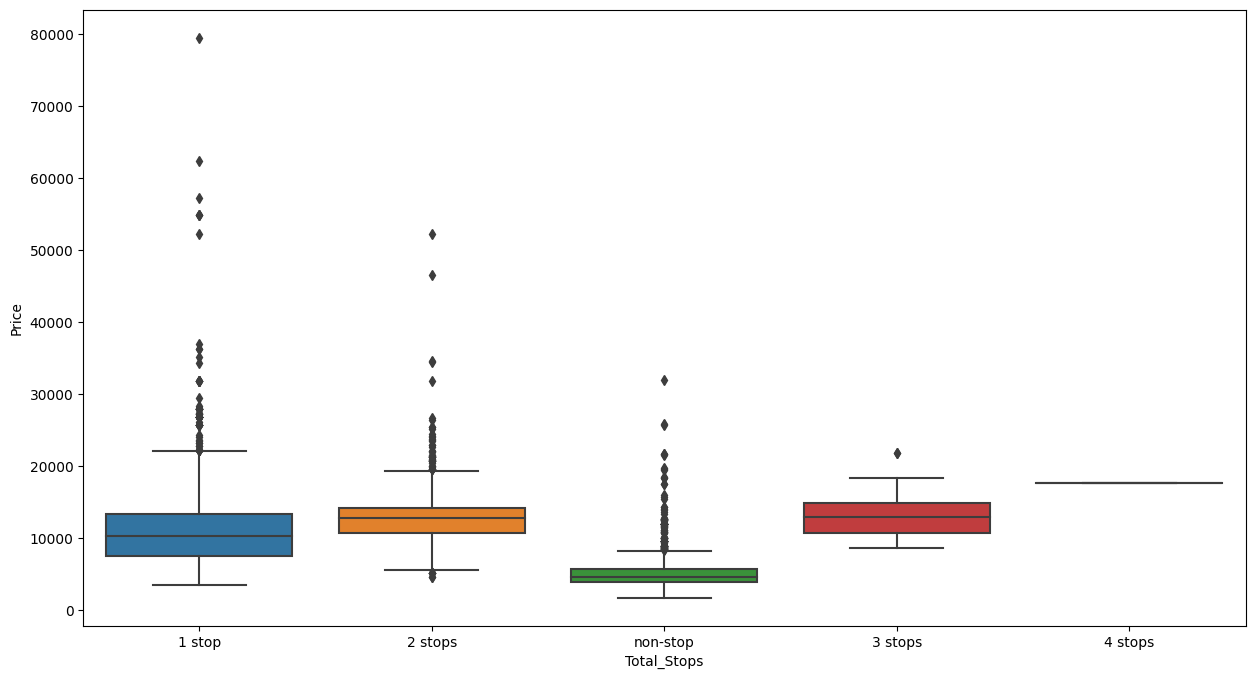

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [39]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [40]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [41]:
categorical['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Figure size 1500x1500 with 0 Axes>

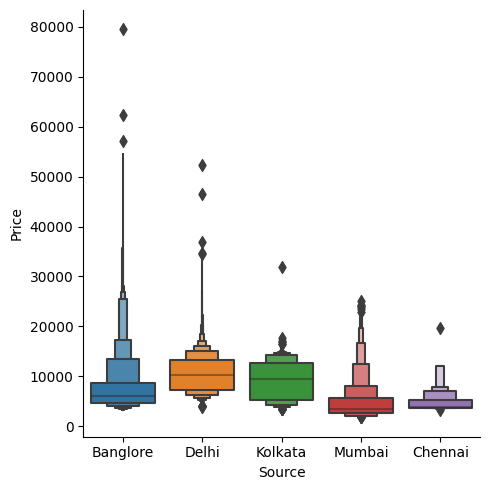

In [42]:
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [43]:
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [44]:
categorical['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

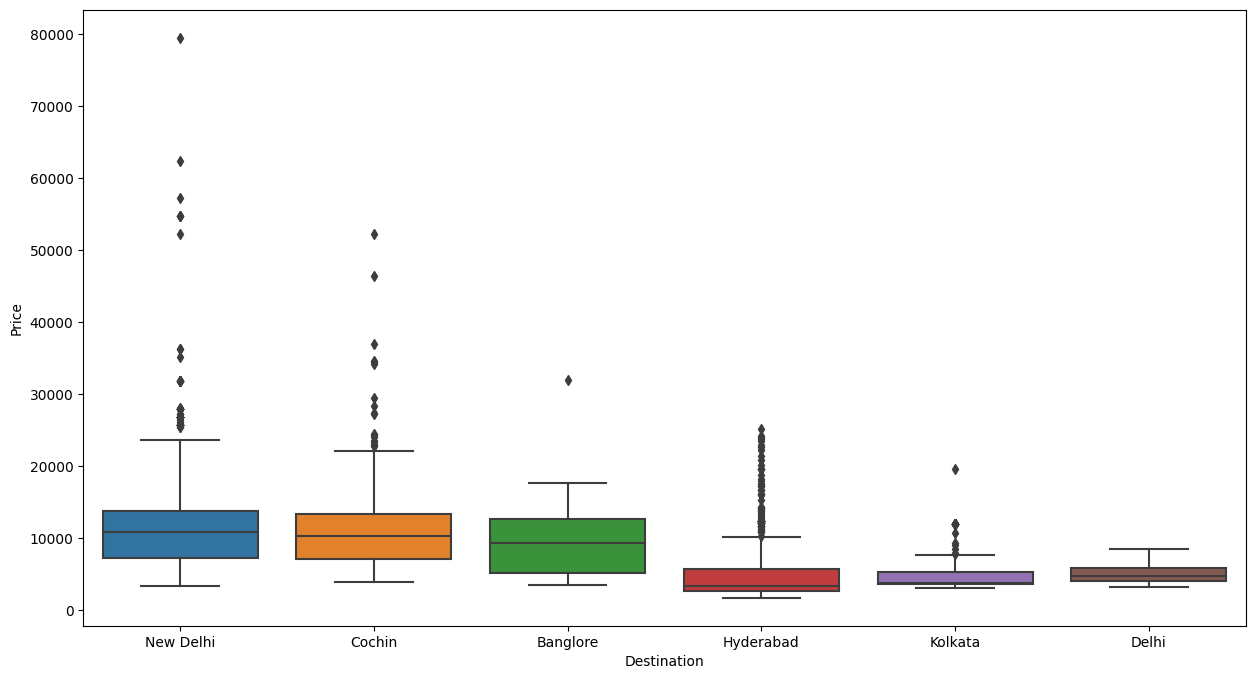

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [46]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [47]:
categorical['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [48]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [49]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [50]:
drop_col(categorical,'Route')

In [51]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [52]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [53]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [54]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [56]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))


Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<Axes: xlabel='Arrival_Time_hour', ylabel='Price'>

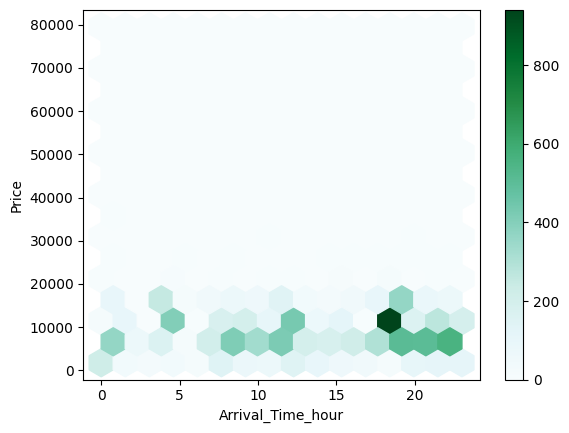

In [57]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [59]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [60]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [61]:
drop_col(categorical,'Additional_Info')

In [62]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [65]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [66]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

In [67]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [68]:
final_df.head()


,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Kolkata,New Delhi,Dep_Time,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,False,False,True,False,...,False,True,2023-04-13 22:20:00,3897,24,3,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,False,False,2023-04-13 05:50:00,7662,1,5,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,False,False,2023-04-13 09:25:00,13882,9,6,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,False,2023-04-13 18:05:00,6218,12,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,False,True,2023-04-13 16:50:00,13302,1,3,21,35,4,45


In [69]:
pd.set_option('display.max_columns',33)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Time,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2023-04-13 22:20:00,3897,24,3,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,2023-04-13 05:50:00,7662,1,5,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,2023-04-13 09:25:00,13882,9,6,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,2023-04-13 18:05:00,6218,12,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2023-04-13 16:50:00,13302,1,3,21,35,4,45


In [70]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

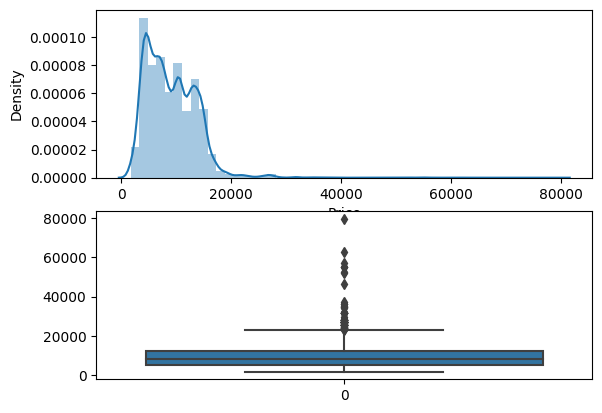

In [71]:
plot(final_df,'Price')

In [72]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

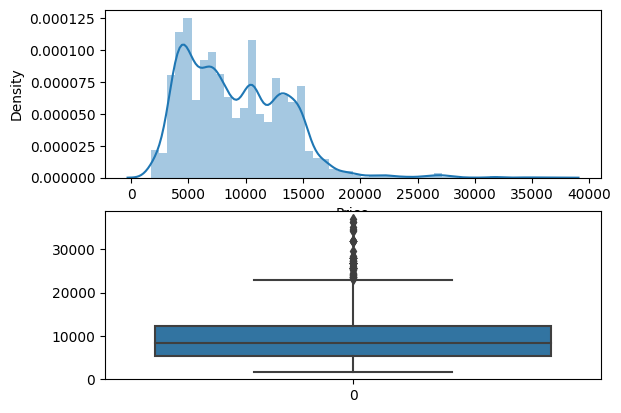

In [73]:
plot(final_df,'Price')

In [74]:
X=final_df.drop('Price',axis=1)
y=df['Price']

In [75]:
from sklearn.feature_selection import mutual_info_classif

In [5]:
mutual_info_classif(X,y)


NameError: name 'mutual_info_classif' is not defined

In [78]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>)

In [ ]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>)

In [6]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

NameError: name 'imp' is not defined

In [7]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

NameError: name 'X' is not defined

In [8]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      
          
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [10]:
predict(RandomForestRegressor())

Model is: RandomForestRegressor()


NameError: name 'X_train' is not defined

In [11]:
predict(LogisticRegression())

Model is: LogisticRegression()


NameError: name 'X_train' is not defined

In [12]:
from sklearn.svm import SVR
predict(SVR())

Model is: SVR()


NameError: name 'X_train' is not defined